<a href="https://colab.research.google.com/github/amanes0310/DataScienceFA24/blob/main/MidtermProjectMA346.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
import statistics
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
dat = pd.read_csv('Spotify Most Streamed Songs.csv')
dat

In [ ]:
daysMonth = [31,28,31,30,31,30,31,31,30,31,30,31]



# Subsetting a dataframe based on only integer values in the streams column
dat2 = dat.loc[dat["streams"] != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"]

# Fractional month to account for day of release
dat2['decimalMonth'] = dat2.apply(lambda row: (row['released_day'] - 1) / daysMonth[row['released_month'] - 1], axis=1)

# Mixed month in order to create an accurate scatterplot of streams vs. month
dat2['mixedMonth'] = dat2['released_month'] + dat2['decimalMonth']


# defining all values as integers
dat2['streams'] = dat2['streams'].astype(int)


# Reassigning songs older than 2006 to April 1, 2006
Before06 = (dat2['released_year'] < 2006)
At06 = (dat2['released_year'] == 2006)
BeforeApril = (dat2['released_month'] < 4)
dat2.loc[Before06 | (At06 & BeforeApril), 'mixedMonth'] = 0.25

# Apply function to subtract the year from 2023
dat2['yearsSinceRelease'] = dat2['released_year'].apply(lambda year: 2023 - max(year, 2006))

# Calculate total years (with fractional) and calculate average streams
dat2['totalYears'] = dat2['yearsSinceRelease'] + dat2['mixedMonth']/12
dat2['avgStreams'] = dat2['streams'] / dat2['totalYears']

# mean and average
meanAVGstreams = np.mean(dat2['avgStreams'])
stdAVGstreams = np.std(dat2['avgStreams'])

# Standardized the streams / year
dat2['avgStreamsStandard'] = (dat2['avgStreams'] - meanAVGstreams) / stdAVGstreams


# Defined parameters for linear model and calculated total SSE
slope, intercept, r_value, p_value, std_err = stats.linregress(dat2['totalYears'], y=dat2['avgStreamsStandard'])
dat2['linearSSE'] = (dat2['avgStreamsStandard'] - (intercept + slope * dat2['totalYears']))**2
totalSSElinear = dat2['linearSSE'].sum()

# Scatterplot of average standardized streams and total years with least squares line
sns.scatterplot(data=dat2, x='totalYears', y='avgStreamsStandard')
sns.lmplot(data=dat2, x='totalYears', y='avgStreamsStandard', line_kws={'color': 'red'})

plt.title('Standardized Average Streams/yr versus Total Years Since Release')
plt.xlabel('Total Years Since Release')
plt.ylabel('Standardized Average Streams Per Year')

plt.show()

NameError: name 'dat' is not defined

Now that we found that the slope parameter is definitely different than 0 (p-value small) for mixedMonth versus streams, we can determine that there is an association between how far into the year it is and how many streams a song has. A linear model may not be the most appropriate way to model the data, given by its small r-value.

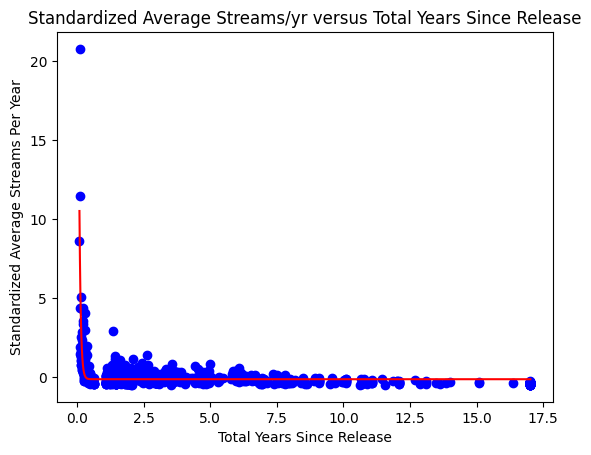

54.26833273351964 18.93482159687877 -0.12621305829845378


<ipython-input-66-6ea304888541>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['ExpoSSE'] = (dat2['avgStreamsStandard'] - (a * np.exp(-b*x) + c))**2


484.21129438215513

In [ ]:
def func(x, a, b, c):
  return a * np.exp(-b*x) + c

# data used to fit from scatterplot above

x = dat2['totalYears']
y = dat2['avgStreamsStandard']

# define parameters and leave covariance BLANK
parameters, _ = curve_fit(func, x, y)
a, b, c = parameters

# Partition the space 952 times (one for each obs)
x2 = np.linspace(min(x), max(x), 952)
y2 = func(x2, a,b,c)

plt.plot(x2, y2, 'r', label = 'Fitted Exponential Curve')
plt.xlabel('Total Years Since Release')
plt.ylabel('Standardized Average Streams Per Year')
plt.title('Standardized Average Streams/yr versus Total Years Since Release')
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()

# Calculate SSE with this model
dat2['ExpoSSE'] = (dat2['avgStreamsStandard'] - (a * np.exp(-b*x) + c))**2
totalSSEexpo = dat2['ExpoSSE'].sum()

# Print parameters for the function yhat = a * e ^ (-bx)
print(a, b, c)
totalSSEexpo

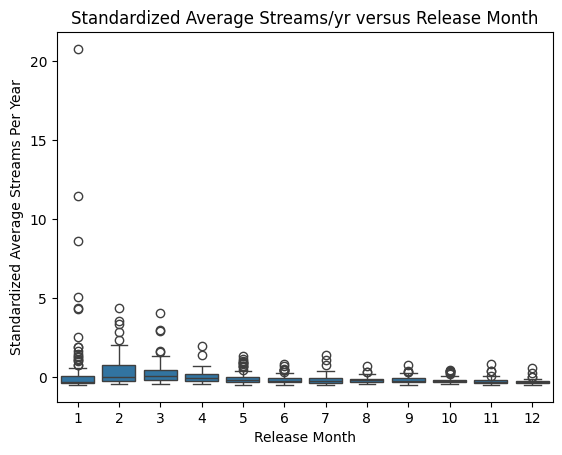

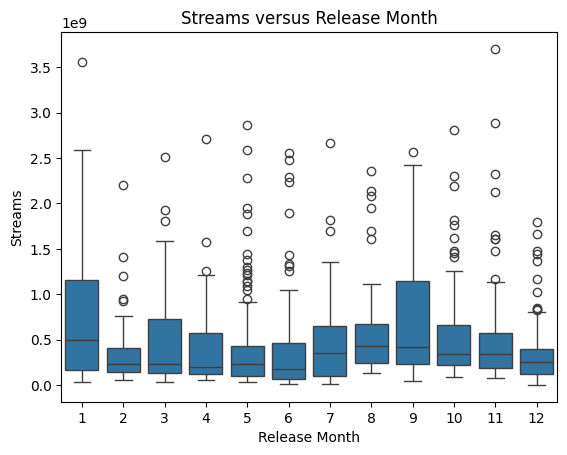

<ipython-input-71-da6fd069483b>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['fittedAVGStreams'] = intercept + (slope * dat2['totalYears'])
<ipython-input-71-da6fd069483b>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['residualAVGstreams'] = dat2['avgStreams'] - dat2['fittedAVGStreams']
<ipython-input-71-da6fd069483b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

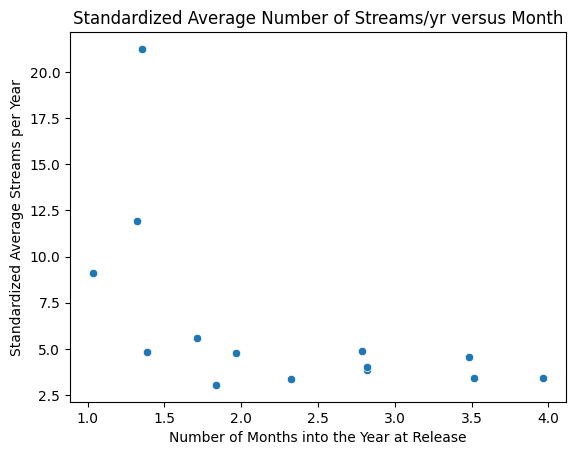

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mixedMonth,yearsSinceRelease,totalYears,avgStreams,avgStreamsStandard,linearSSE,ExpoSSE,fittedAVGStreams,residualAVGstreams,stResid
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,3.483871,0,0.290323,2.500598e+09,4.071228,15.454184,15.800931,0.140047,2.500598e+09,4.556384
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,3.516129,0,0.293011,1.889467e+09,2.957089,7.936353,8.248021,0.139936,1.889467e+09,3.442831
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,1.354839,0,0.112903,1.166358e+10,20.776034,425.541227,210.344787,0.147383,1.166358e+10,21.252414
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,3.967742,1,1.330645,1.888699e+09,2.955690,8.171935,9.498128,0.097031,1.888699e+09,3.441432
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686,91,...,2.821429,0,0.235119,2.112954e+09,3.364523,10.382530,8.169230,0.142330,2.112954e+09,3.850051
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,1.967742,0,0.163978,2.621257e+09,4.291199,17.188713,3.938737,0.145271,2.621257e+09,4.776239
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393,115,...,2.785714,0,0.232143,2.666420e+09,4.373534,17.902049,14.672940,0.142453,2.666420e+09,4.858531
40,El Azul,"Junior H, Peso Pluma",2,2023,2,10,692,25,354495408,10,...,2.321429,0,0.193452,1.832469e+09,2.853177,7.339357,2.518867,0.144053,1.832469e+09,3.338973
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108,87,...,2.821429,0,0.235119,2.206308e+09,3.534716,11.508281,9.171078,0.142330,2.206308e+09,4.020153
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,1.032258,0,0.086022,5.010113e+09,8.646263,72.212060,3.508289,0.148495,5.010113e+09,9.129015


In [ ]:


# Creating boxplots of standardized avg streams and avg streams
sns.boxplot(data=dat2, x='released_month', y='avgStreamsStandard')
plt.xlabel('Release Month')
plt.ylabel('Standardized Average Streams Per Year')
plt.title('Standardized Average Streams/yr versus Release Month')
plt.show()

sns.boxplot(data=dat2, x='released_month', y='streams')
plt.xlabel('Release Month')
plt.ylabel('Streams')
plt.title('Streams versus Release Month')
plt.show()

# Found SD of average streams column and standardized residuals
SD = statistics.stdev(dat2['avgStreams'])
x = dat2['mixedMonth']
y = dat2['avgStreams']
ybar = (intercept + slope*x)
stResid = (y - ybar) / SD

# Fitted values, residual values, and standardized residual values for all observations compared to linear model fit
dat2['fittedAVGStreams'] = intercept + (slope * dat2['totalYears'])
dat2['residualAVGstreams'] = dat2['avgStreams'] - dat2['fittedAVGStreams']
dat2['stResid'] = dat2['residualAVGstreams'] / SD



# Outlier dataframe (more than 3SD either side) and scatterplot of these values versus mixed month value
outliers = dat2.loc[abs(dat2['stResid']) > 3]
sns.scatterplot(data=outliers, x='mixedMonth', y='stResid')
plt.xlabel('Number of Months into the Year at Release')
plt.ylabel('Standardized Average Streams per Year')
plt.title('Standardized Average Number of Streams/yr versus Month')
plt.show()



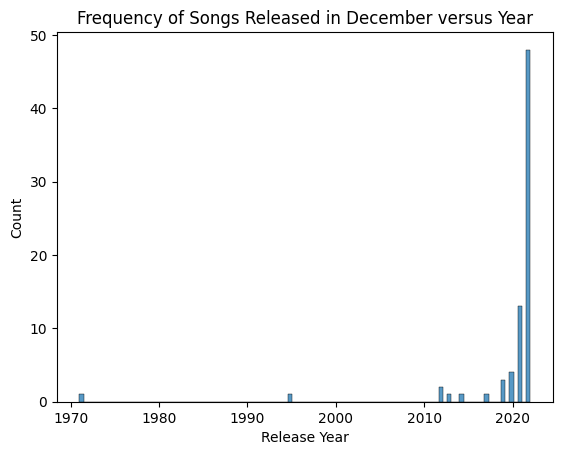

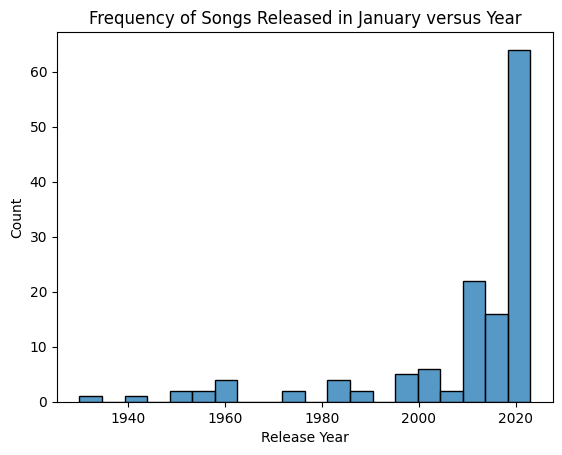

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,decimalMonth,mixedMonth,yearsSinceRelease,totalYears,avgStreams,avgStreamsStandard,linearSSE,fittedAVGStreams,residualAVGstreams,stResid
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,...,0.000000,0.0,17.25,17.25,1.164693e+08,-0.275125,0.077815,-0.55408,1.164693e+08,0.212214
166,Every Breath You Take - Remastered 2003,The Police,1,1983,1,6,22439,19,1593270737,211,...,0.161290,0.0,17.25,17.25,9.236352e+07,-0.319071,0.055229,-0.55408,9.236352e+07,0.168292
425,Dream On,Aerosmith,1,1973,1,5,168,0,838586769,0,...,0.129032,0.0,17.25,17.25,4.861373e+07,-0.398827,0.024103,-0.55408,4.861373e+07,0.088577
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",3,1930,1,1,323,0,90598517,4,...,0.000000,0.0,17.25,17.25,5.252088e+06,-0.477877,0.005807,-0.55408,5.252088e+06,0.009570
442,Last Christmas,Wham!,1,1984,1,1,22153,0,1159176109,274,...,0.000000,0.0,17.25,17.25,6.719862e+07,-0.364947,0.035771,-0.55408,6.719862e+07,0.122440
443,Rockin' Around The Christmas Tree,Brenda Lee,1,1958,1,1,14994,0,769213520,191,...,0.000000,0.0,17.25,17.25,4.459209e+07,-0.406159,0.021881,-0.55408,4.459209e+07,0.081250
444,Jingle Bell Rock,Bobby Helms,1,1957,1,1,10326,0,741301563,165,...,0.000000,0.0,17.25,17.25,4.297400e+07,-0.409109,0.021017,-0.55408,4.297400e+07,0.078301
459,A Holly Jolly Christmas - Single Version,Burl Ives,1,1952,1,1,7930,0,395591396,108,...,0.000000,0.0,17.25,17.25,2.293283e+07,-0.445644,0.011758,-0.55408,2.293284e+07,0.041785
465,Merry Christmas Everyone,Shakin' Stevens,1,1984,1,1,1087,0,351636786,90,...,0.000000,0.0,17.25,17.25,2.038474e+07,-0.450290,0.010772,-0.55408,2.038474e+07,0.037142
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,1950,1,1,10585,0,473248298,126,...,0.000000,0.0,17.25,17.25,2.743468e+07,-0.437437,0.013605,-0.55408,2.743468e+07,0.049988


In [ ]:
# Histogram on count versus release year for December songs
datDecember = dat2.loc[dat2['released_month'] == 12]
sns.histplot(data=datDecember, x='released_year')
plt.xlabel('Release Year')
plt.title('Frequency of Songs Released in December versus Year')
plt.show()
# not a disproportionately large amount of old songs in December - I suppose they're not released in December!

datOld = dat2.loc[dat2['released_year'] < 1990]
datOld

# Histogram on count versus release year for January songs
datJanuary = dat2.loc[dat2['released_month'] == 1]
sns.histplot(data=datJanuary, x='released_year')
plt.xlabel('Release Year')
plt.title('Frequency of Songs Released in January versus Year')
plt.show()

# Look at January songs that are also old
# They are mainly Christmas songs - this is dragging down the boxplot.
datOldJanuary = datOld.loc[datOld['released_month'] == 1]
datOldJanuary

In [ ]:
### This is extra code that has no reference in my project aside from the appendix.
### It was found that there is a significant difference between the proportion of minor songs within the outliers and those within the whole sample.
###
propOutlierMinor = len(outliers.loc[outliers['mode'] == 'Minor'])
numObsOut = len(outliers['mode'])

propMainMinor = len(dat2.loc[dat2['mode'] == 'Minor'])
numObsMain = len(dat2['mode'])

numerator = np.array([propOutlierMinor, propMainMinor])
denominator = np.array([numObsOut, numObsMain])

tStat, pValue = proportions_ztest(numerator, denominator)

alpha = 0.05

pValue < alpha


True